In [23]:
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load the regression models
transformer_model = load_model('../models/transformer_regression_model.h5')
MLP_model = load_model('../models/MLP_regression_model.h5')

In [25]:
# Load test data
test_df = pd.read_csv('../data/regression_test_data.csv')

# Extract the columns you want to use as input features
columns = ['BERT_sentiment_score', 'normalised_word_count', 'pub_day', 'pub_hour', 'topic']

x_test = test_df[columns]

y_test = np.array(test_df['n_comments'])

In [26]:
mse, mae = transformer_model.evaluate(x_test, y_test)
print('Validation MSE:', mse)
print('Validation MAE:', mae)

78/78 [==============================] - 1s 3ms/step - loss: 211293.9062 - mae: 238.7667
Validation MSE: 211293.90625
Validation MAE: 238.7667236328125


In [27]:
loss, mse, mae = MLP_model.evaluate(x_test, y_test)
print('Validation MSE:', mse)
print('Validation MAE:', mae)

78/78 [==============================] - 0s 2ms/step - loss: 226819.2656 - mean_squared_error: 226819.2656 - mean_absolute_error: 279.6906
Validation MSE: 226819.265625
Validation MAE: 279.6905822753906


In [29]:
# Get predicted values
y_pred_transformer = transformer_model.predict(x_test)
y_pred_MLP = MLP_model.predict(x_test)

78/78 [==============================] - 0s 1ms/step


In [ ]:
# Calculate errors
transformer_errors = y_pred_transformer - y_test
MLP_errors = y_pred_MLP - y_test

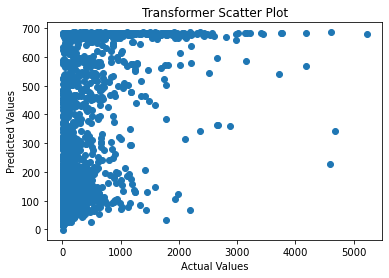

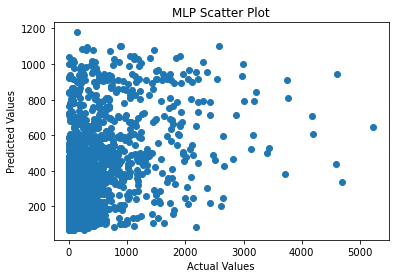

In [30]:
# Scatter plot
plt.scatter(y_test, y_pred_transformer)
plt.title('Transformer: Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

plt.scatter(y_test, y_pred_MLP)
plt.title('MLP: Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

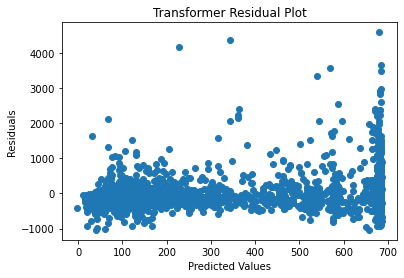

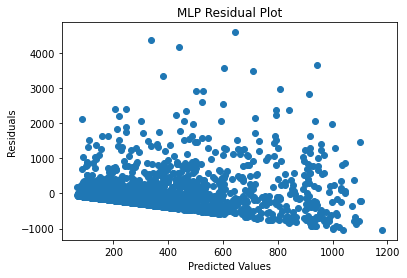

In [43]:
# Residual plots
transformer_residuals = y_test - y_pred_transformer.reshape(-1)
plt.scatter(y_pred_transformer, residuals)
plt.title('Transformer: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

MLP_residuals = y_test - y_pred_MLP.reshape(-1)
plt.scatter(y_pred_MLP, residuals)
plt.title('MLP: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

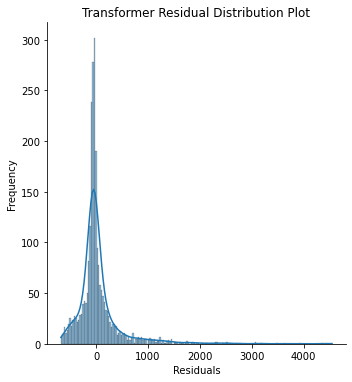

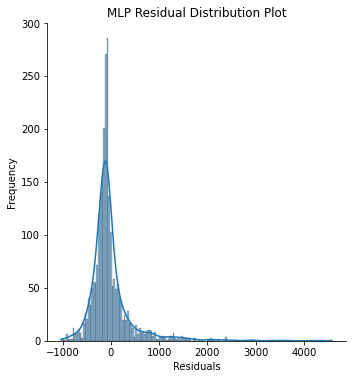

In [45]:
# Distribution plot
sns.displot(transformer_residuals, kde=True)
plt.title('Transformer: Residual Distribution Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

sns.displot(MLP_residuals, kde=True)
plt.title('MLP: Residual Distribution Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

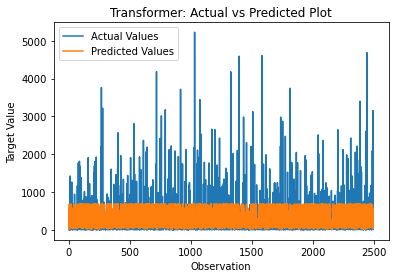

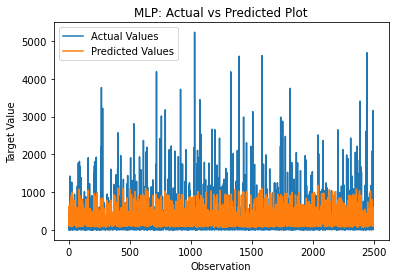

In [47]:
# Actual vs predicted plots
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred_transformer, label='Predicted Values')
plt.title('Transformer: Actual vs Predicted Plot')
plt.xlabel('Observation')
plt.ylabel('Target Value')
plt.legend()
plt.show()

plt.plot(y_test, label='Actual Values')
plt.plot(y_pred_MLP, label='Predicted Values')
plt.title('MLP: Actual vs Predicted Plot')
plt.xlabel('Observation')
plt.ylabel('Target Value')
plt.legend()
plt.show()